In [4]:
from tsai.all import *
import pandas as pd
from datenverarbeitung.dataloader import dataloader
import datetime
CUDA_LAUNCH_BLOCKING=1



num_scenario = 4
nr_taps = 1
tap_size = 36
move_by = -8
#batch_size = 1 
learning_cycles = 6
model_to_use = "InceptionTimePlus"
features_to_learn_with = ["nosetip_y","chin_y","right_eye_corner_y", "left_eye_corner_x"]
feature_list_string = '_'.join(features_to_learn_with)

models_folder = "models"
plots_folder = "vis/plots"
save_name = "scenario_{}_{}".format(num_scenario, model_to_use)

dl = dataloader(scenario= num_scenario, path="/home/adi/cloudy_adlu/smart_hans/AP2/Daten/zum_sichten/laeuft", nr_taps=nr_taps, move_window_by=move_by, tap_size=tap_size, feature_list=features_to_learn_with)
train, test, df_n= dl.train, dl.test, dl.df

print(" hhhhhhhh ")

cols = list(df_n.columns)
a, b = cols.index('sample_index'), cols.index('feature')
cols[b], cols[a] = cols[a], cols[b]
df_n = df_n[cols]
print(df_n)
df_n = df_n.sort_values(['feature','target'])#.reset_index(drop=True)

smart_hans_07312022_173453_4_131-155_08_mnn_.csv
smart_hans_07312022_171736_10_271-296_08_mnn_.csv
smart_hans_08022022_211852_10_341-371_08_mky_.csv
smart_hans_07312022_182331_4_149-180_08_wnn_.csv
smart_hans_08022022_190740_9_301-331_08_mny_.csv
smart_hans_07312022_181701_7_243-273_08_wny_.csv
smart_hans_07252022_154619_12_431-469_08_mgy_.csv
smart_hans_08022022_192941_6_217-247_08_wny_.csv
smart_hans_07312022_173105_12_400-431_08_mnn_.csv
smart_hans_07312022_175436_12_339-368_08_mny_.csv
smart_hans_08022022_192131_8_280-310_08_wny_.csv
smart_hans_07312022_161925_10_313-339_08_mny_.csv
smart_hans_08022022_191248_9_307-336_08_mny_.csv
smart_hans_08022022_192219_4_154-184_08_wny_person_hat_nach_12_gewackelt.csv
smart_hans_08022022_174636_13_433-463_08_wyn_.csv
smart_hans_07312022_170216_4_149-178_08_mgy_furz_lachen_am_ende.csv
smart_hans_08022022_195007_9_312-344_08_gny_.csv
smart_hans_08022022_194923_10_343-374_08_gny_.csv
smart_hans_08022022_192033_4_152-183_08_wny_.csv
smart_hans_080

In [5]:
print(df_n["feature"])
print(df_n['sample_index'])
print(" hhhhhhhh ")

X, old_y, names = df2xy (df_n, sample_col='sample_index', feat_col='feature', target_col='target', data_cols=None, steps_in_rows=True, return_names=True)

print(names)
print(f"shape ours {df_n.shape}")


y = np.empty(len(old_y))
for i, elem in enumerate(old_y):
    for number in elem:
            remainder = number % 10
            y[i] = remainder

print(y)
print(y.shape)
   

#print(" hhhhhhhh ")
splits = get_splits(y, valid_size=.2)
splits

tfms  = [None, TSRegression()]
#dsets = TSDatasets(X,  splits=splits, inplace=True)
dsets = TSDatasets( X,y,  inplace=True, splits=splits, tfms=[None, TSClassification()])

print(dsets)


dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, num_workers=0, tfms=[None, TSClassification()], item_tfs=TSClassification())
b = dls.one_batch()

dls.show_batch(sharey=True)



0       1.0
6       1.0
14      1.0
22      1.0
30      1.0
       ... 
1093    4.0
1101    4.0
1109    4.0
1117    4.0
1125    4.0
Name: feature, Length: 1126, dtype: float64
0         0.0
6         2.0
14        4.0
22        6.0
30        8.0
        ...  
1093    273.0
1101    275.0
1109    277.0
1117    279.0
1125    281.0
Name: sample_index, Length: 1126, dtype: float64
 hhhhhhhh 


ValueError: cannot reshape array of size 40536 into shape (282,4,newaxis)

In [ ]:

scenario_name_stage0 = "multivar_scenario_{}_{}_stage0".format(num_scenario, "InceptionTimePlus")
print(dls.vars)
print(dls.c)
model = InceptionTimePlus(dls.vars, dls.c, tap_size)
learn = Learner(dls, model, metrics=accuracy, lr=0.001)
learn.save(scenario_name_stage0)

4
2


Path('models/multivar_scenario_3_InceptionTimePlus_stage0.pth')

SuggestedLRs(valley=0.00010964782268274575)

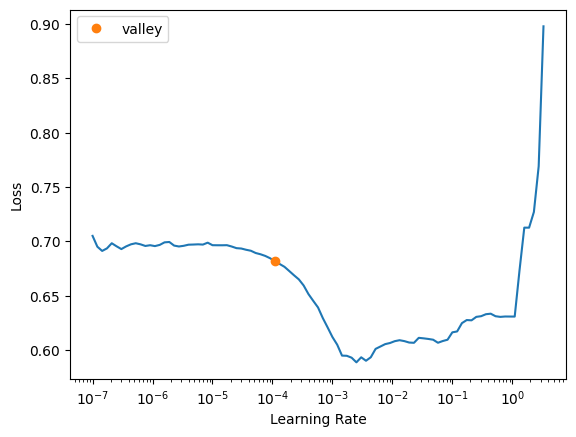

In [ ]:
learn.load(scenario_name_stage0)
"y not being batched correctly? https://forums.fast.ai/t/input-training-batch-size-error-for-multi-class-classification-with-custom-dataset/85220/2"
learn.lr_find(start_lr=1e-07, end_lr=10, num_it=100, stop_div=True, show_plot=True)

In [ ]:
scenario_name_stage1 = scenario_name_stage0.replace("0","1")
learn.fit_one_cycle(learning_cycles, lr_max=1e-3)
learn.save(scenario_name_stage1)

epoch,train_loss,valid_loss,accuracy,time
0,0.700417,0.697106,0.500000,00:00
1,0.663393,0.697661,0.500000,00:00
2,0.612611,0.697791,0.500000,00:00
3,0.543399,0.696429,0.500000,00:00
4,0.483241,0.695268,0.500000,00:00
5,0.430603,0.698688,0.553571,00:00


Path('models/multivar_scenario_3_InceptionTimePlus_stage1.pth')

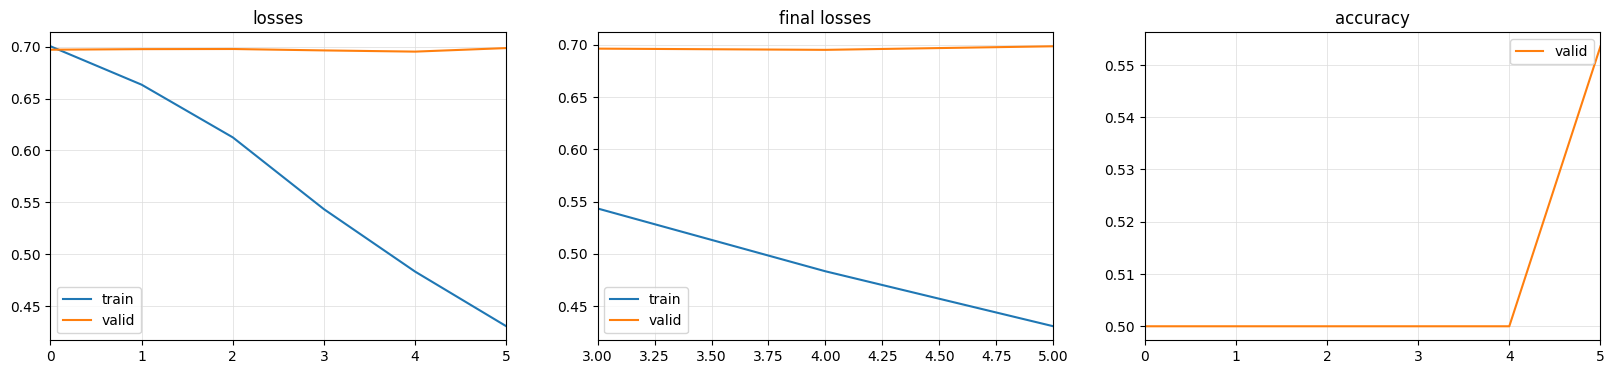

In [ ]:
learn.recorder.plot_metrics()

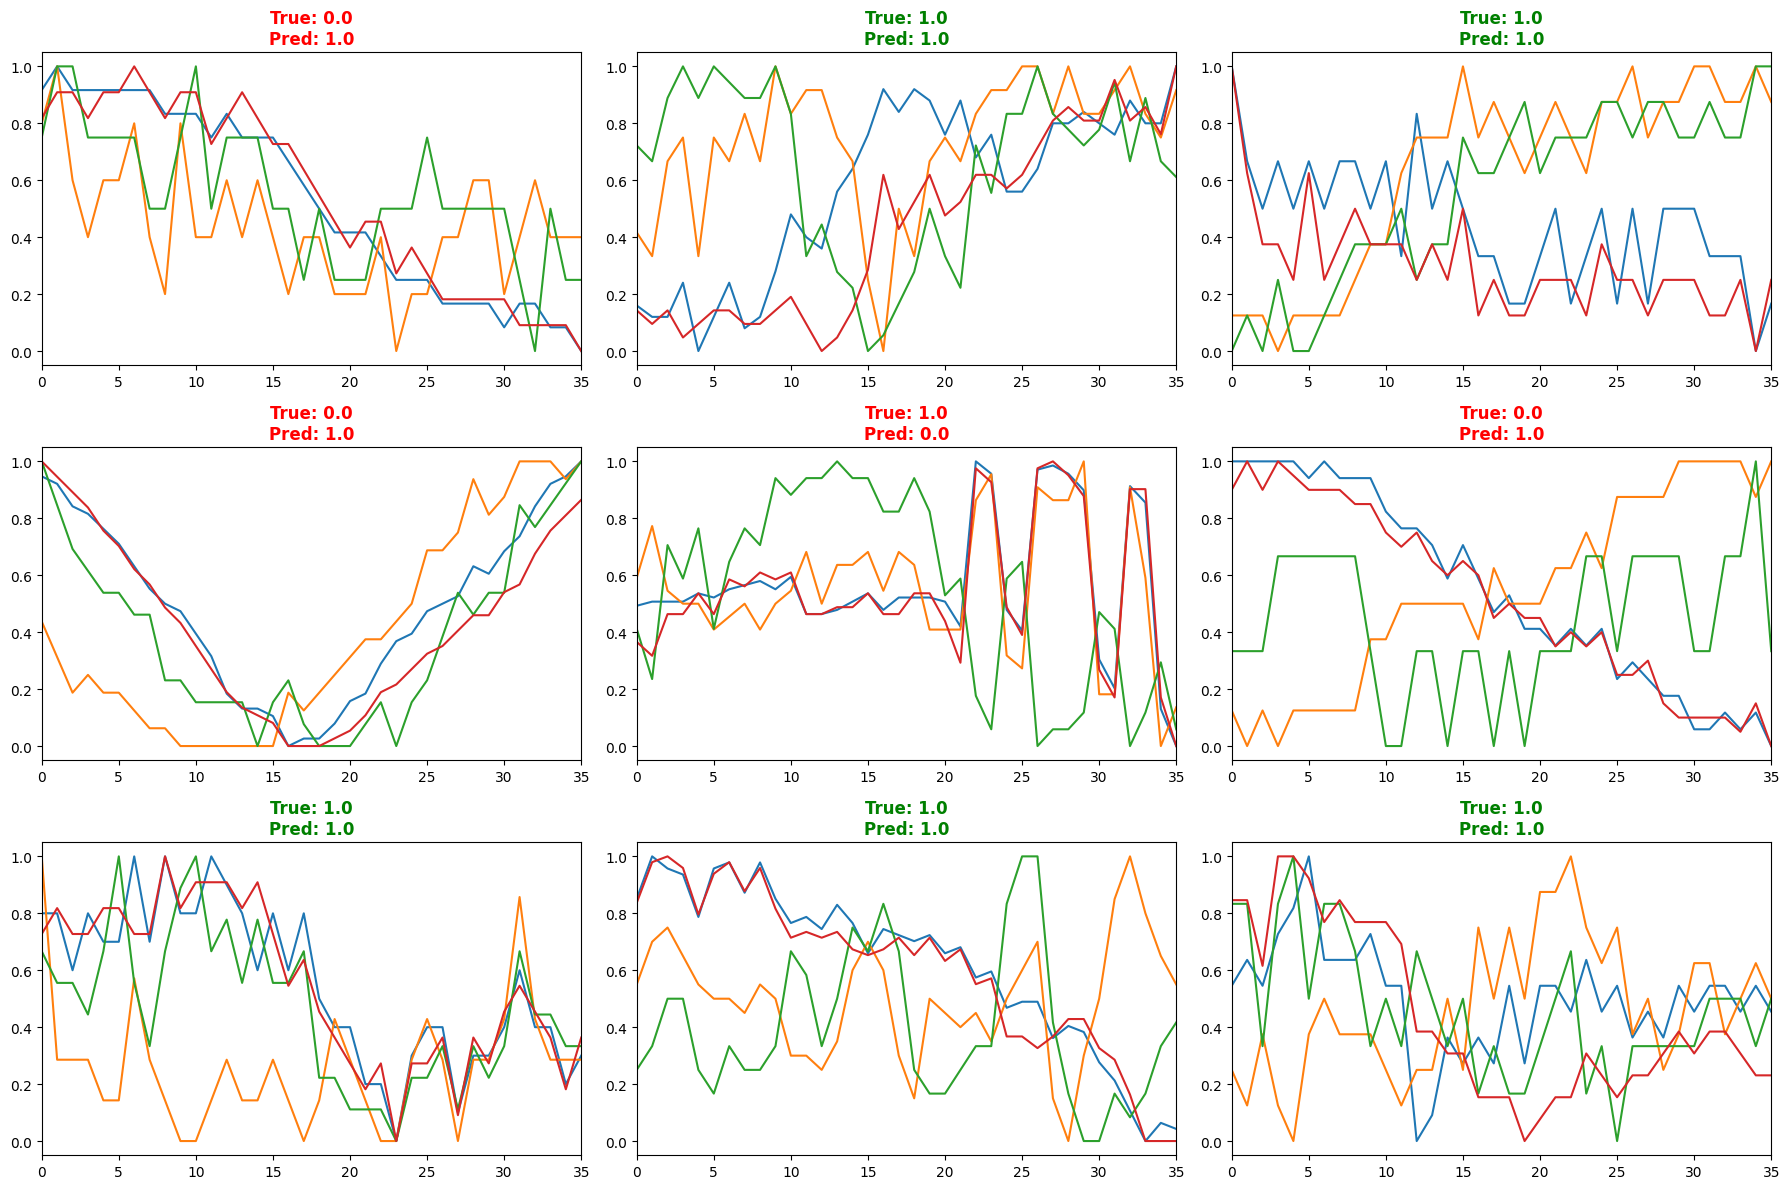

In [ ]:
learn.show_results()

not enough values to plot a chart


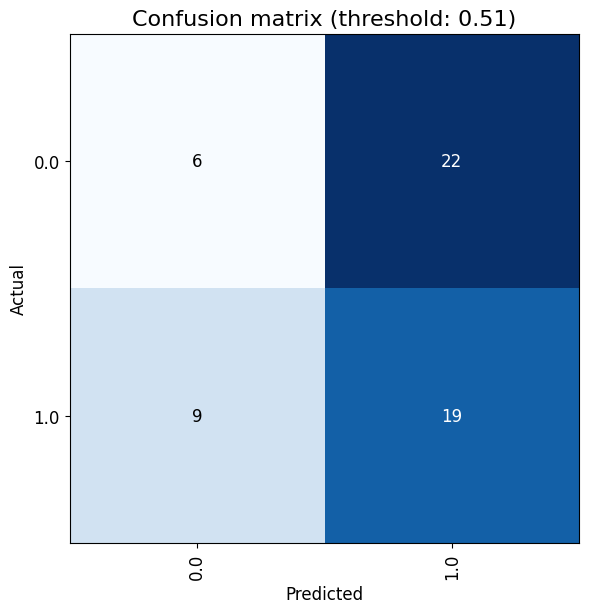

In [ ]:
learn.recorder.plot_metrics()
learn.plot_confusion_matrix(thr=0.51)
feature_list_string = '_'.join(features_to_learn_with)
current_time= datetime.datetime.now().strftime('%d%m%Y_%H%M%S')
plot_name = plots_folder+"/confusion_matrix_"+save_name+"_nrtaps_{}_features_{}_learning_cycles_{}_{}.png".format(str(nr_taps),feature_list_string,learning_cycles, current_time)


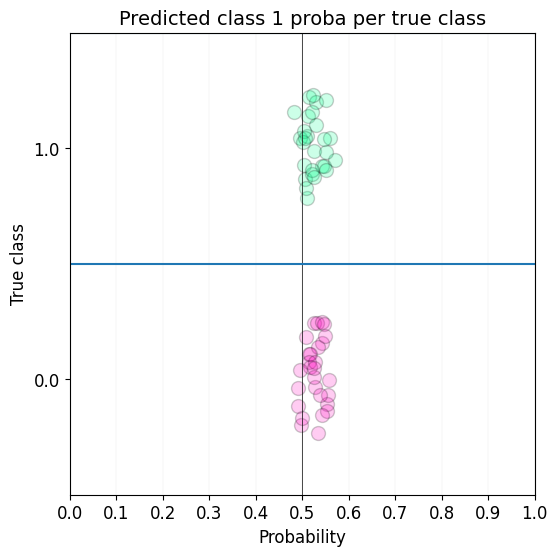

In [ ]:
learn.show_probas()
#was sagt probability aus? accuracy vs probability?

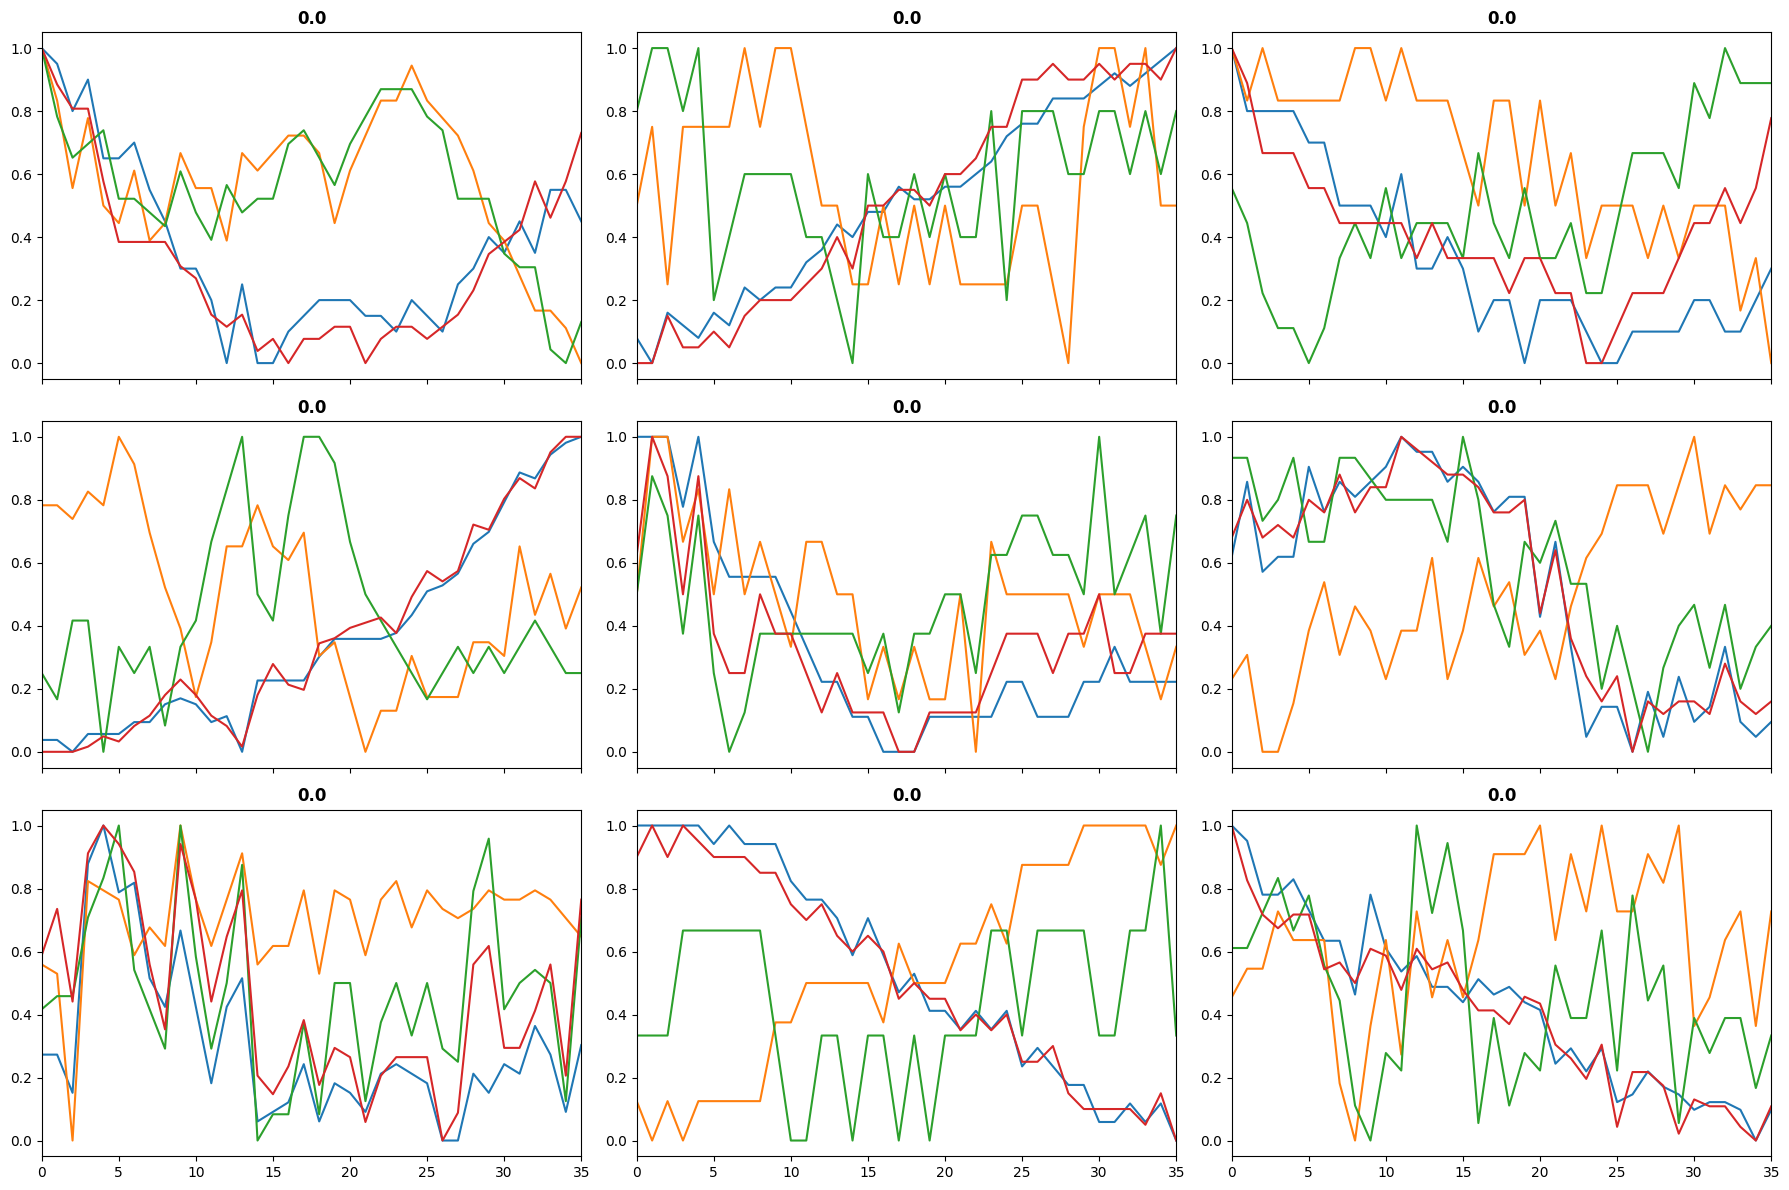

In [ ]:
learn.plot_top_losses(X[splits[1]], y[splits[1]], largest=True)